# Data Collection


In [45]:
import requests
import pandas as pd
import numpy as np


In [19]:
import time
time.sleep(1)  

API_KEY = "e61bdc280ee72926adbd94ad62932b67"


BASE_URL = "https://api.themoviedb.org/3/movie/popular"


GENRES_URL = f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US"


def fetch_genres(api_key):
    response = requests.get(GENRES_URL)
    if response.status_code == 200:
        data = response.json()
        return {genre['id']: genre['name'] for genre in data['genres']}
    else:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ –∂–∞–Ω—Ä–æ–≤: {response.status_code}")
        return {}


def fetch_movie_details(movie_id, api_key):
    movie_details_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US"
    credits_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}&language=en-US"
    keywords_url = f"https://api.themoviedb.org/3/movie/{movie_id}/keywords?api_key={api_key}&language=en-US"

    details_response = requests.get(movie_details_url)
    credits_response = requests.get(credits_url)
    keywords_response = requests.get(keywords_url)

    if details_response.status_code == 200 and credits_response.status_code == 200 and keywords_response.status_code == 200:
        details_data = details_response.json()
        credits_data = credits_response.json()
        keywords_data = keywords_response.json()

        #
        tagline = details_data.get('tagline', '')
        keywords = ', '.join([kw['name'] for kw in keywords_data['keywords']])
        cast = ', '.join([actor['name'] for actor in credits_data['cast'][:5]])  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –ø–µ—Ä–≤—ã–º–∏ 5 –∞–∫—Ç–µ—Ä–∞–º–∏
        director = ', '.join([person['name'] for person in credits_data['crew'] if person['job'] == 'Director'])

        return {'keywords': keywords, 'tagline': tagline, 'cast': cast, 'director': director}
    else:
        print(f"–û—à–∏–±–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ñ–∏–ª—å–º–∞ —Å ID {movie_id}")
        return {'keywords': '', 'tagline': '', 'cast': '', 'director': ''}


def fetch_movies(api_key, genres_map, max_rows=100):
    all_movies = []  
    total_rows = 0  
    page = 1         

    while total_rows < max_rows:
        
        url = f"{BASE_URL}?api_key={api_key}&language=en-US&page={page}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            movies = data['results']  

            for movie in movies:
                
                title = movie.get('title', None)
                release_date = movie.get('release_date', None)
                release_year = release_date.split('-')[0] if release_date else None
                imdb_rating = movie.get('vote_average', None)
                vote_count = movie.get('vote_count', None)
                description = movie.get('overview', None)
                poster_url = f"https://image.tmdb.org/t/p/w500{movie['poster_path']}" if movie.get('poster_path') else None

                
                genre_ids = movie.get('genre_ids', [])
                genres = [genres_map.get(genre_id, "Unknown") for genre_id in genre_ids]

                
                movie_details = fetch_movie_details(movie['id'], api_key)

                
                all_movies.append({
                    'Movie Title': title,
                    'Genre(s)': ', '.join(genres),
                    'Release Year': release_year,
                    'IMDb Rating': imdb_rating,
                    'Number of Votes': vote_count,
                    'Movie Description': description,
                    'Poster URL': poster_url,
                    'Keywords': movie_details['keywords'],
                    'Tagline': movie_details['tagline'],
                    'Cast': movie_details['cast'],
                    'Director': movie_details['director']
                })
                total_rows += 1

                
                if total_rows >= max_rows:
                    break

            
            if page >= data['total_pages']:
                break

            page += 1  
        else:
            print(f"–û—à–∏–±–∫–∞: {response.status_code}, —Å—Ç—Ä–∞–Ω–∏—Ü–∞ {page}")
            break

    return all_movies



genres_map = fetch_genres(API_KEY)


movies_data = fetch_movies(API_KEY, genres_map, max_rows=4000)


df = pd.DataFrame(movies_data)


df.to_csv("movies_with_additional_featuresBat.csv", index=False)


print(df.head())
print(f"–í—Å–µ–≥–æ —Å—Ç—Ä–æ–∫: {len(df)}")

             Movie Title                              Genre(s) Release Year  \
0  Venom: The Last Dance    Action, Science Fiction, Adventure         2024   
1                Moana 2  Animation, Adventure, Family, Comedy         2024   
2              Elevation     Action, Science Fiction, Thriller         2024   
3             Absolution               Action, Crime, Thriller         2024   
4                  Armor               Action, Crime, Thriller         2024   

   IMDb Rating  Number of Votes  \
0          6.7             1233   
1          6.9              436   
2          6.4              128   
3          6.0              121   
4          5.6               55   

                                   Movie Description  \
0  Eddie and Venom are on the run. Hunted by both...   
1  After receiving an unexpected call from her wa...   
2  A single father and two women venture from the...   
3  An aging ex-boxer gangster working as muscle f...   
4  Armored truck security guard Ja

In [46]:
df=pd.read_csv(r"movies_with_additional_featuresBat.csv")
df.head(3)

Movie Title                              Genre(s)  Release Year  \
0  Venom: The Last Dance    Action, Science Fiction, Adventure        2024.0   
1                Moana 2  Animation, Adventure, Family, Comedy        2024.0   
2              Elevation     Action, Science Fiction, Thriller        2024.0   

   IMDb Rating  Number of Votes  \
0          6.7             1233   
1          6.9              436   
2          6.4              128   

                                   Movie Description  \
0  Eddie and Venom are on the run. Hunted by both...   
1  After receiving an unexpected call from her wa...   
2  A single father and two women venture from the...   

                                          Poster URL  \
0  https://image.tmdb.org/t/p/w500/aosm8NMQ3UyoBV...   
1  https://image.tmdb.org/t/p/w500/yh64qw9mgXBvla...   
2  https://image.tmdb.org/t/p/w500/uQhYBxOVFU6s9a...   

                                            Keywords  \
0  hero, superhero, anti hero, villain, alien lif...   
1               sea, ocean, villain, musical, sequel   
2  mine, colorado, hospital, alien invasion, ski ...   

                           Tagline  \
0         'Til death do they part.   
1  The ocean is calling them back.   
2   Don't go down without a fight.   

                                                Cast  \
0  Tom Hardy, Chiwetel Ejiofor, Juno Temple, Clar...   
1  Auli ªi Cravalho, Dwayne Johnson, HualƒÅlai Chun...   
2  Anthony Mackie, Morena Baccarin, Maddie Hasson...   

                                            Director  
0                                       Kelly Marcel  
1  David G. Derrick Jr., Jason Hand, Dana Ledoux ...  
2                                       George Nolfi

# Milestone 2: Data Cleaning and Preprocessing


In [47]:
df.isnull().sum()

Movie Title            0
Genre(s)               9
Release Year           9
IMDb Rating            0
Number of Votes        0
Movie Description     24
Poster URL             2
Keywords             307
Tagline              758
Cast                  23
Director              21
dtype: int64

In [48]:
md=df['Release Year'].mode().iloc[0]
df['Release Year']=df['Release Year'].fillna(md)
df.isnull().sum()

Movie Title            0
Genre(s)               9
Release Year           0
IMDb Rating            0
Number of Votes        0
Movie Description     24
Poster URL             2
Keywords             307
Tagline              758
Cast                  23
Director              21
dtype: int64

In [49]:
nl='nulll'
df['Poster URL']=df['Poster URL'].fillna(nl)
df.isnull().sum()

Movie Title            0
Genre(s)               9
Release Year           0
IMDb Rating            0
Number of Votes        0
Movie Description     24
Poster URL             0
Keywords             307
Tagline              758
Cast                  23
Director              21
dtype: int64

In [50]:

df = df.drop_duplicates()


print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {len(df)}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 3247


In [51]:

selected_features = ['Genre(s)','Keywords','Tagline','Cast','Director','Movie Description']
print(selected_features)

for feature in selected_features:
  df[feature] = df[feature].fillna('')


['Genre(s)', 'Keywords', 'Tagline', 'Cast', 'Director', 'Movie Description']


In [52]:
df.isnull().sum()

Movie Title          0
Genre(s)             0
Release Year         0
IMDb Rating          0
Number of Votes      0
Movie Description    0
Poster URL           0
Keywords             0
Tagline              0
Cast                 0
Director             0
dtype: int64

In [53]:
df_genres = df["Genre(s)"].str.get_dummies(sep=', ').astype(int)  


df1 = pd.concat([df.drop(columns=["Genre(s)"]), df_genres], axis=1)
df1


Movie Title  Release Year  IMDb Rating  \
0                     Venom: The Last Dance        2024.0        6.700   
1                                   Moana 2        2024.0        6.900   
2                                 Elevation        2024.0        6.400   
3                                Absolution        2024.0        6.000   
4                                     Armor        2024.0        5.600   
...                                     ...           ...          ...   
3995     R-Rated Idol Seung-ha's Fancy Walk        2020.0        7.700   
3996               The Greatest of All Time        2024.0        4.900   
3997                            The Faculty        1998.0        6.500   
3998                                G-Force        2009.0        5.449   
3999  The Discreet Charm of the Bourgeoisie        1972.0        7.480   

      Number of Votes                                  Movie Description  \
0                1233  Eddie and Venom are on the run. Hunted by both...   
1                 436  After receiving an unexpected call from her wa...   
2                 128  A single father and two women venture from the...   
3                 121  An aging ex-boxer gangster working as muscle f...   
4                  55  Armored truck security guard James Brody is wo...   
...               ...                                                ...   
3995               15  Seo-yeon is being tutored by Woo-hyeon who is ...   
3996               14  A once decorated member of the Special Anti-Te...   
3997             1970  When some very creepy things start happening a...   
3998             1856  A team of trained secret agent animals, guinea...   
3999              792  In Luis Bu√±uel‚Äôs deliciously satiric masterpie...   

                                             Poster URL  \
0     https://image.tmdb.org/t/p/w500/aosm8NMQ3UyoBV...   
1     https://image.tmdb.org/t/p/w500/yh64qw9mgXBvla...   
2     https://image.tmdb.org/t/p/w500/uQhYBxOVFU6s9a...   
3     https://image.tmdb.org/t/p/w500/cNtAslrDhk1i3I...   
4     https://image.tmdb.org/t/p/w500/pnXLFioDeftqjl...   
...                                                 ...   
3995  https://image.tmdb.org/t/p/w500/l0jd4v2490rC9o...   
3996  https://image.tmdb.org/t/p/w500/r5FjbUg5Ei9I1q...   
3997  https://image.tmdb.org/t/p/w500/5XetJwmAiDC0Et...   
3998  https://image.tmdb.org/t/p/w500/fkqcF21HKZPvCw...   
3999  https://image.tmdb.org/t/p/w500/zN4ILX2x64PvT2...   

                                               Keywords  \
0     hero, superhero, anti hero, villain, alien lif...   
1                  sea, ocean, villain, musical, sequel   
2     mine, colorado, hospital, alien invasion, ski ...   
3                                              gangster   
4                                         armored truck   
...                                                 ...   
3995                                           softcore   
3996          covert agency, dual role, science fiction   
3997  drug dealer, high school, homophobia, paranoia...   
3998  secret agent, guinea pig, dyr, duringcreditsst...   
3999  diplomat, dream, nightmare, upper class, date,...   

                              Tagline  \
0            'Til death do they part.   
1     The ocean is calling them back.   
2      Don't go down without a fight.   
3           Everyone pays in the end.   
4             On the bridge of death.   
...                               ...   
3995                                    
3996             A Venkat Prabhu Hero   
3997         Take me to your teacher.   
3998    The world needs bigger heroes   
3999                                    

                                                   Cast  \
0     Tom Hardy, Chiwetel Ejiofor, Juno Temple, Clar...   
1     Auli ªi Cravalho, Dwayne Johnson, HualƒÅlai Chun...   
2     Anthony Mackie, Morena Baccarin, Maddie Hasson...   
3     Liam Neeson, Ron Perlman, Yolonda Ross, Franki...   
4     Sylvester Sta

# Milestone 3: Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df1.describe()


Release Year  IMDb Rating  Number of Votes       Action    Adventure  \
count   3849.000000  3849.000000      3849.000000  3849.000000  3849.000000   
mean    2010.530008     6.594272      3247.097168     0.332814     0.226552   
std       14.900020     1.220134      4534.337833     0.471282     0.418655   
min     1921.000000     0.000000         0.000000     0.000000     0.000000   
25%     2004.000000     6.143000       237.000000     0.000000     0.000000   
50%     2015.000000     6.700000      1533.000000     0.000000     0.000000   
75%     2022.000000     7.300000      4377.000000     1.000000     0.000000   
max     2027.000000    10.000000     36635.000000     1.000000     1.000000   

         Animation       Comedy        Crime  Documentary        Drama  ...  \
count  3849.000000  3849.000000  3849.000000  3849.000000  3849.000000  ...   
mean      0.135360     0.293583     0.126526     0.008574     0.351000  ...   
std       0.342152     0.455462     0.332485     0.092208     0.477345  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

           History       Horror        Music      Mystery      Romance  \
count  3849.000000  3849.000000  3849.000000  3849.000000  3849.000000   
mean      0.040790     0.157184     0.018706     0.076383     0.148870   
std       0.197829     0.364021     0.135503     0.265645     0.356006   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Science Fiction     TV Movie     Thriller          War      Western  
count      3849.000000  3849.000000  3849.000000  3849.000000  3849.000000  
mean          0.146272     0.017407     0.275656     0.029098     0.013770  
std           0.353424     0.130800     0.446902     0.168104     0.116549  
min           0.000000     0.000000     0.000000     0.000000     0.000000  
25%           0.000000     0.000000     0.000000     0.000000     0.000000  
50%           0.000000     0.000000     0.000000     0.000000     0.000000  
75%           0.000000     0.000000     1.000000     0.000000     0.000000  
max           1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 22 columns]

In [32]:

mean_rating = df1['IMDb Rating'].mean()
median_rating = df1['IMDb Rating'].median()
std_rating = df1['IMDb Rating'].std()

print(f"–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥: {mean_rating}")
print(f"–ú–µ–¥–∏–∞–Ω–∞ —Ä–µ–π—Ç–∏–Ω–≥–∞: {median_rating}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {std_rating}")


–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥: 6.594272278513899
–ú–µ–¥–∏–∞–Ω–∞ —Ä–µ–π—Ç–∏–Ω–≥–∞: 6.7
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 1.2201342293336055


C:\Users\Asus\AppData\Local\Temp\ipykernel_17348\4234322933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


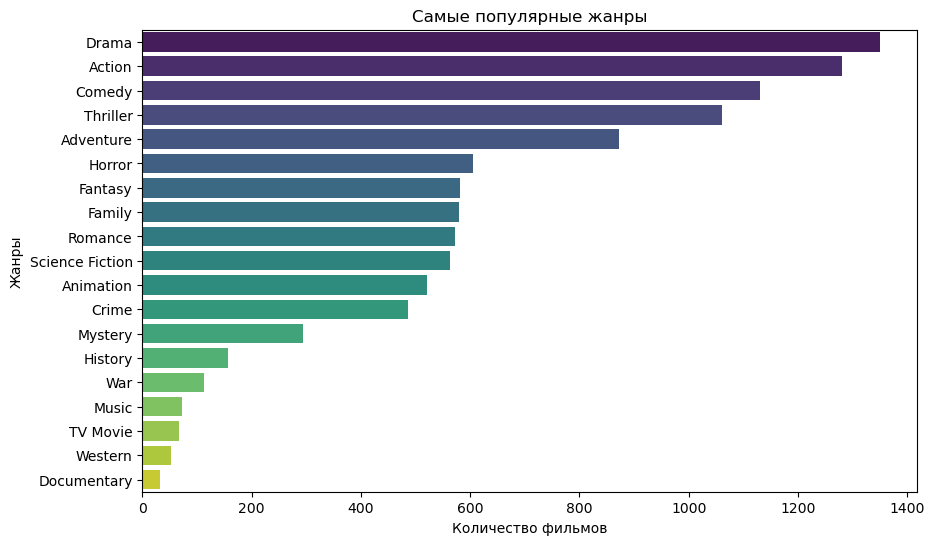

In [33]:
genre_counts = df.iloc[:, 6:].sum().sort_values(ascending=False) 

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã")
plt.xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å–º–æ–≤")
plt.ylabel("–ñ–∞–Ω—Ä—ã")
plt.show()


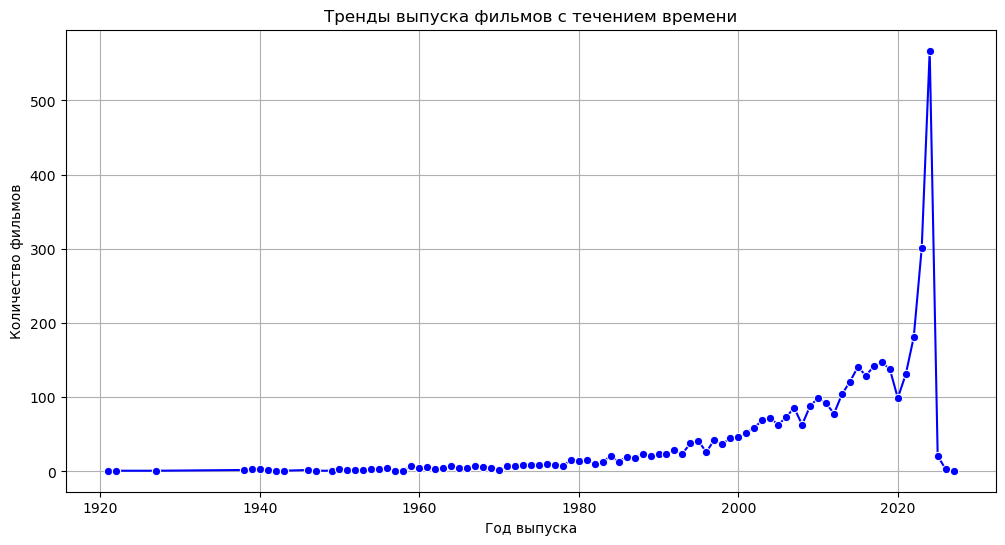

In [34]:

release_trend = df['Release Year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o', color='b')
plt.title("–¢—Ä–µ–Ω–¥—ã –≤—ã–ø—É—Å–∫–∞ —Ñ–∏–ª—å–º–æ–≤ —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏")
plt.xlabel("–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å–º–æ–≤")
plt.grid(True)
plt.show()


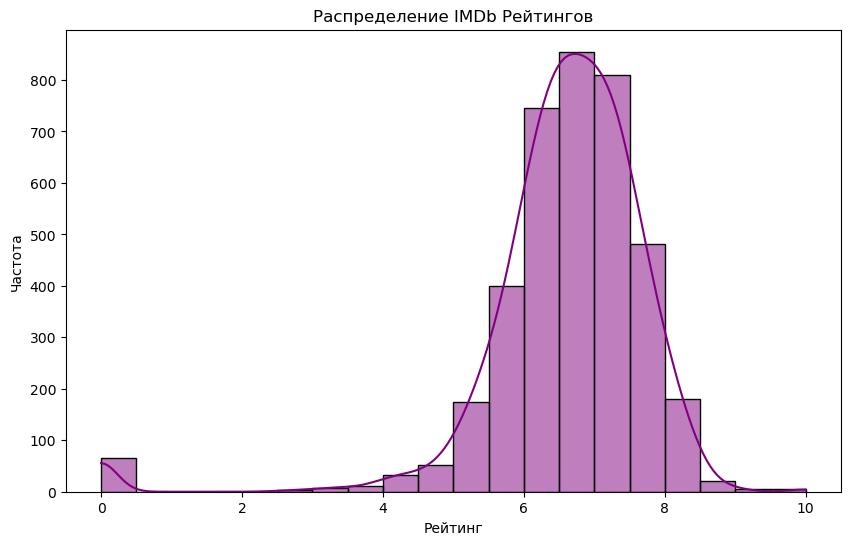

In [35]:

plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb Rating'], kde=True, bins=20, color='purple')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ IMDb –†–µ–π—Ç–∏–Ω–≥–æ–≤")
plt.xlabel("–†–µ–π—Ç–∏–Ω–≥")
plt.ylabel("–ß–∞—Å—Ç–æ—Ç–∞")
plt.show()


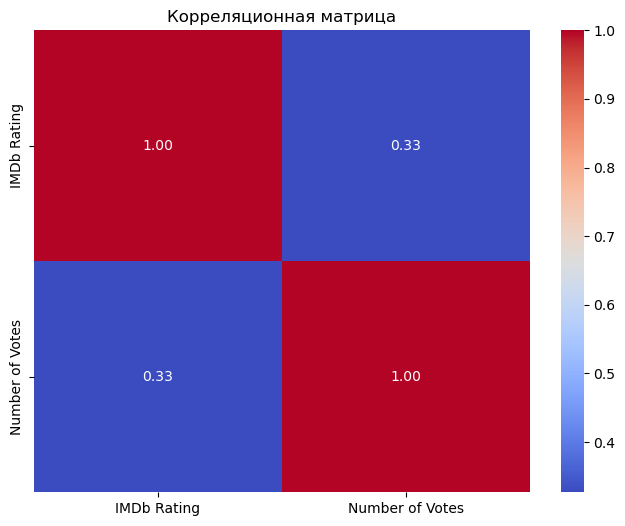

In [36]:

correlation_matrix = df[['IMDb Rating', 'Number of Votes']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_17348\3106434480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Decade', data=df, palette='viridis')


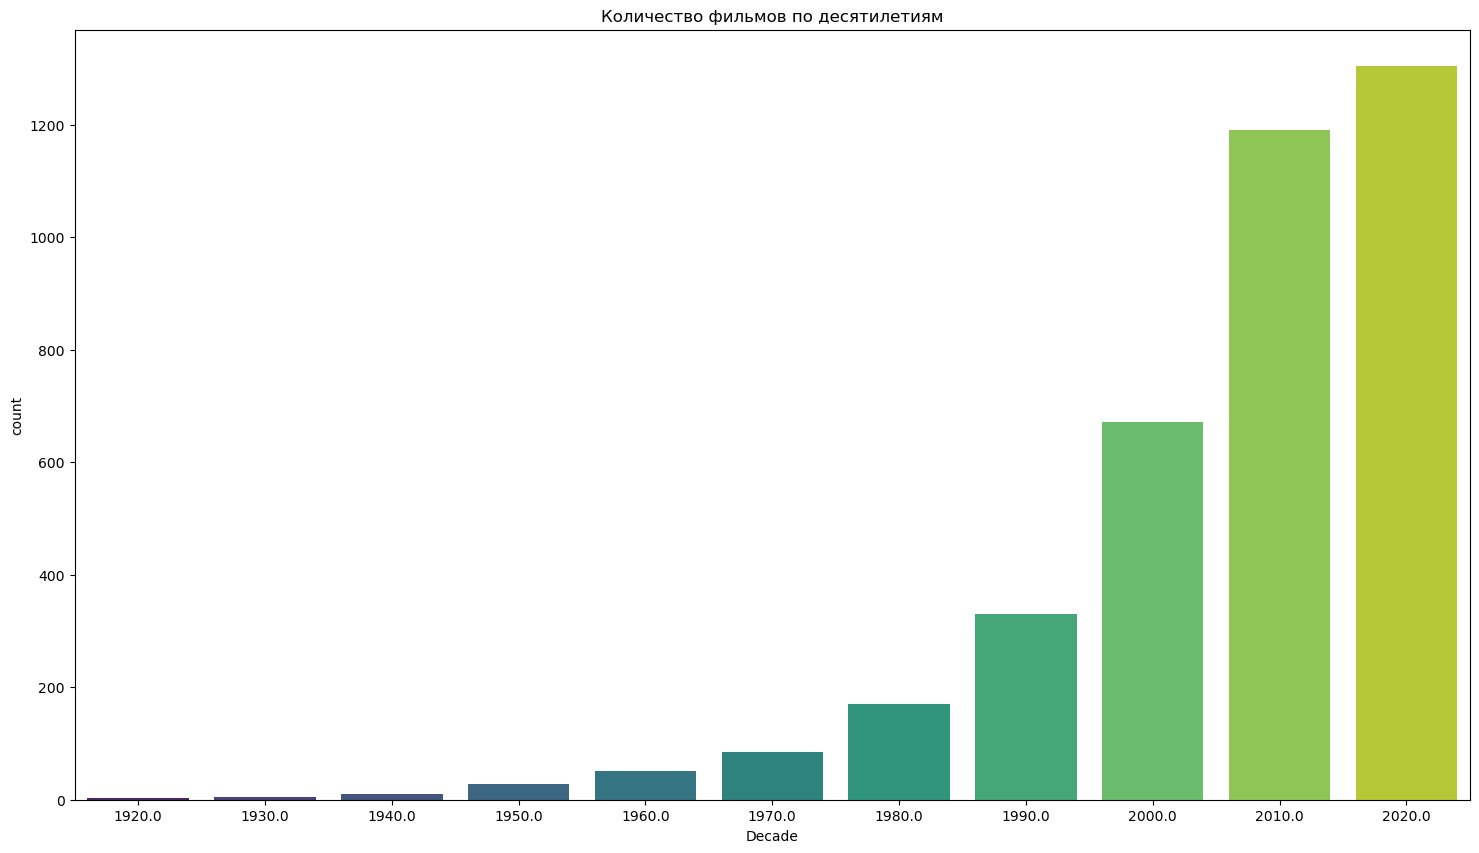

In [42]:
df['Decade'] = (df['Release Year'] // 10) * 10  
plt.figure(figsize=(18, 10))
sns.countplot(x='Decade', data=df, palette='viridis')
plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å–º–æ–≤ –ø–æ –¥–µ—Å—è—Ç–∏–ª–µ—Ç–∏—è–º")
plt.show()


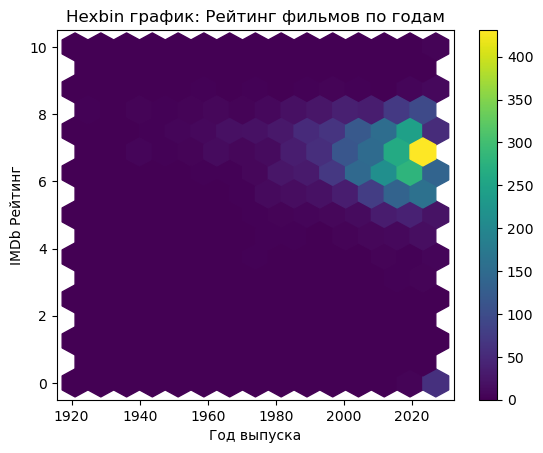

In [44]:



df.plot.hexbin(x='Release Year', y='IMDb Rating', gridsize=14, cmap='viridis')


plt.title("Hexbin –≥—Ä–∞—Ñ–∏–∫: –†–µ–π—Ç–∏–Ω–≥ —Ñ–∏–ª—å–º–æ–≤ –ø–æ –≥–æ–¥–∞–º")
plt.xlabel("–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞")
plt.ylabel("IMDb –†–µ–π—Ç–∏–Ω–≥")
plt.show()


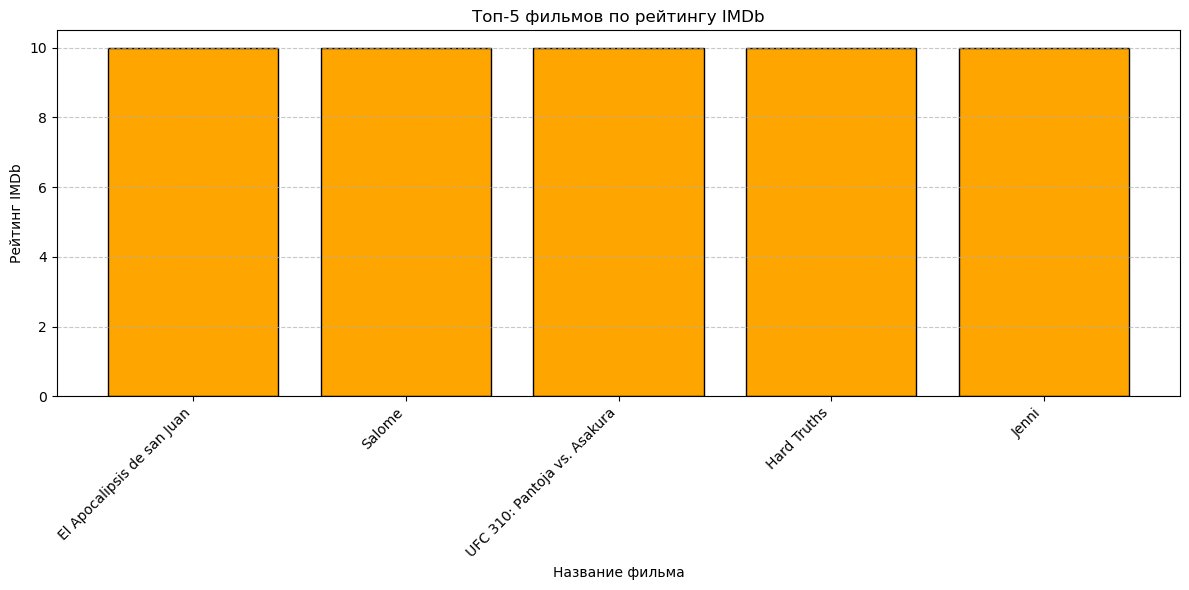

In [45]:


top5_movies = df.nlargest(5, 'IMDb Rating')


plt.figure(figsize=(12, 6))
plt.bar(top5_movies['Movie Title'], top5_movies['IMDb Rating'], color='orange', edgecolor='black')
plt.title("–¢–æ–ø-5 —Ñ–∏–ª—å–º–æ–≤ –ø–æ —Ä–µ–π—Ç–∏–Ω–≥—É IMDb")
plt.xlabel("–ù–∞–∑–≤–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞")
plt.ylabel("–†–µ–π—Ç–∏–Ω–≥ IMDb")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Milestone 4: Linear Regression Model for Rating Prediction


In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
numerical_columns = ['Release Year','IMDb Rating', 'Number of Votes']


df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])


df1.head(2)


Movie Title  Release Year  IMDb Rating  Number of Votes  \
0  Venom: The Last Dance      0.885127     0.113639        -0.414985   
1                Moana 2      0.885127     0.266472        -0.586691   

                                   Movie Description  \
0  Eddie and Venom are on the run. Hunted by both...   
1  After receiving an unexpected call from her wa...   

                                          Poster URL  \
0  https://image.tmdb.org/t/p/w500/aosm8NMQ3UyoBV...   
1  https://image.tmdb.org/t/p/w500/yh64qw9mgXBvla...   

                                            Keywords  \
0  hero, superhero, anti hero, villain, alien lif...   
1               sea, ocean, villain, musical, sequel   

                           Tagline  \
0         'Til death do they part.   
1  The ocean is calling them back.   

                                                Cast  \
0  Tom Hardy, Chiwetel Ejiofor, Juno Temple, Clar...   
1  Auli ªi Cravalho, Dwayne Johnson, HualƒÅlai Chun...   

                                            Director  ...  History  Horror  \
0                                       Kelly Marcel  ...        0       0   
1  David G. Derrick Jr., Jason Hand, Dana Ledoux ...  ...        0       0   

   Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  Western  
0      0        0        0                1         0         0    0        0  
1      0        0        0                0         0         0    0        0  

[2 rows x 29 columns]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

In [18]:
df1.head(1)

Movie Title  Release Year  IMDb Rating  Number of Votes  \
0  Venom: The Last Dance      0.885127     0.113639        -0.414985   

                                   Movie Description  \
0  Eddie and Venom are on the run. Hunted by both...   

                                          Poster URL  \
0  https://image.tmdb.org/t/p/w500/aosm8NMQ3UyoBV...   

                                            Keywords  \
0  hero, superhero, anti hero, villain, alien lif...   

                    Tagline  \
0  'Til death do they part.   

                                                Cast      Director  ...  \
0  Tom Hardy, Chiwetel Ejiofor, Juno Temple, Clar...  Kelly Marcel  ...   

   History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  \
0        0       0      0        0        0                1         0   

   Thriller  War  Western  
0         0    0        0  

[1 rows x 29 columns]

In [25]:
X = df1.drop(columns=['Movie Title','Movie Description','Poster URL','Keywords','Tagline','IMDb Rating','Cast','Director']) #its qualitative and 

Y = df1['IMDb Rating']

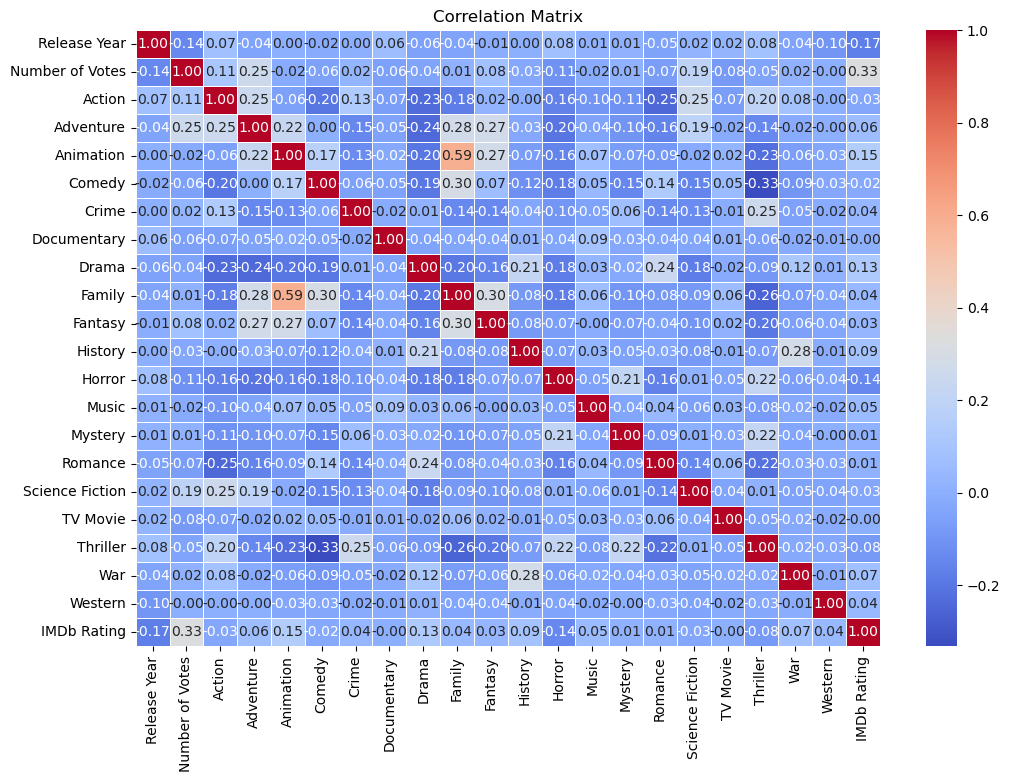

In [12]:
X_with_Y = X.copy()
X_with_Y['IMDb Rating'] = Y


correlation_matrix = X_with_Y.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train

Release Year  Number of Votes  Action  Adventure  Animation  Comedy  \
968       0.167017         3.045852       1          1          0       0   
823       0.558713         1.178198       0          1          0       1   
3688     -1.987313        -0.582598       0          0          0       0   
2275      0.167017        -0.030208       1          0          0       0   
3521     -0.224680         0.677299       0          0          0       0   
...            ...              ...     ...        ...        ...     ...   
1351      0.232300         0.139775       1          0          0       0   
1408      0.885127        -0.679546       0          0          0       0   
1596     -1.138638        -0.237893       0          0          0       1   
1048      0.623996         1.133386       1          1          0       0   
3916      0.885127        -0.670282       0          0          0       1   

      Crime  Documentary  Drama  Family  ...  History  Horror  Music  Mystery  \
968       0            0      0       0  ...        0       0      0        0   
823       0            0      0       0  ...        0       0      0        0   
3688      0            0      1       0  ...        0       0      1        0   
2275      1            0      0       0  ...        0       0      0        0   
3521      1            0      0       0  ...        0       0      0        0   
...     ...          ...    ...     ...  ...      ...     ...    ...      ...   
1351      1            0      0       0  ...        0       0      0        0   
1408      0            0      0       0  ...        0       1      0        0   
1596      0            0      0       0  ...        0       0      0        0   
1048      0            0      0       0  ...        0       0      0        0   
3916      0            0      0       0  ...        0       0      0        0   

      Romance  Science Fiction  TV Movie  Thriller  War  Western  
968         0                1         0         0    0        0  
823         0                0         0         0    0        0  
3688        0                0         0         0    0        0  
2275        0                0         0         0    0        0  
3521        0                0         0         1    0        0  
...       ...              ...       ...       ...  ...      ...  
1351        0                0         0         1    0        0  
1408        0                0         0         1    0        0  
1596        0                0         0         0    0        0  
1048        0                0         0         0    0        0  
3916        0                0         0         0    0        0  

[2597 rows x 21 columns]

In [52]:
linear_reg = LinearRegression()

In [53]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
from sklearn.metrics import mean_squared_error

def model_evaluation(linear_reg, X_test, y_test, model_name):
    y_pred = linear_reg.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test, y_test, 'Linear Reg.')

Linear Reg.
MAE          0.539578
MSE          0.784771
RMSE         0.885873
R2-Score     0.198456

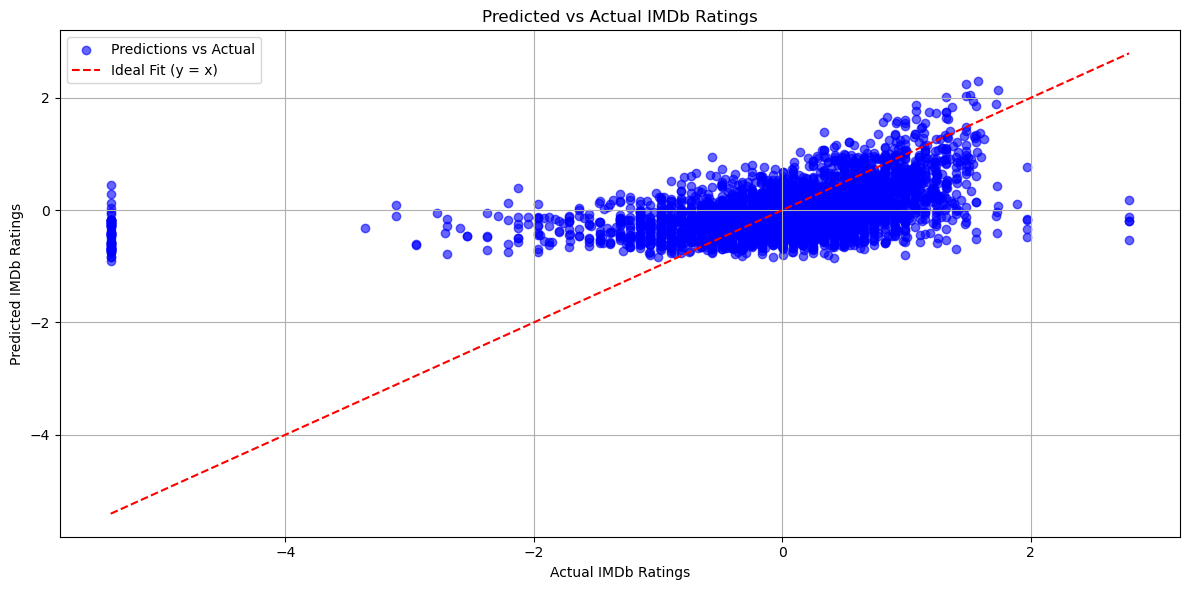

In [57]:
predictions = linear_reg.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(Y, predictions, color='blue', alpha=0.6, label='Predictions vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Ideal Fit (y = x)')


plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.title("Predicted vs Actual IMDb Ratings")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Extra Credit  neural network for prediction

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=500, random_state=42)


mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 0.51
Root Mean Squared Error (RMSE): 0.86


# Milestone 5: Building a Simple Recommendation System


In [27]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
df.isnull().sum()

Movie Title            0
Genre(s)               7
Release Year           0
IMDb Rating            0
Number of Votes        0
Movie Description     20
Poster URL             0
Keywords             245
Tagline              625
Cast                  17
Director              17
dtype: int64

In [35]:


combined_features = df['Genre(s)']+' '+df['Keywords']+' '+df['Tagline']+' '+df['Cast']+' '+df['Director']+' '+df['Movie Description']


combined_features = combined_features.str.lower().str.strip()

print(combined_features)

0       action, science fiction, adventure hero, super...
1       animation, adventure, family, comedy sea, ocea...
2       action, science fiction, thriller mine, colora...
3       action, crime, thriller gangster everyone pays...
4       action, crime, thriller armored truck on the b...
                              ...                        
3995    drama, romance softcore  seung ha, seo bo-ra, ...
3996    action, drama, thriller covert agency, dual ro...
3997    horror, science fiction, mystery drug dealer, ...
3998    animation, family, fantasy, action, adventure,...
3999    comedy diplomat, dream, nightmare, upper class...
Length: 3247, dtype: object


In [36]:


vectorizer = TfidfVectorizer(stop_words='english')

In [37]:
feature_vectors = vectorizer.fit_transform(combined_features)


In [12]:
print(feature_vectors)

  (0, 6064)	0.13271763640665582
  (0, 5934)	0.20140368666249617
  (0, 3461)	0.12143866115586333
  (0, 6286)	0.1530507806691656
  (0, 6675)	0.15840569802732715
  (0, 9150)	0.10197825432134151
  (0, 7420)	0.14737800920220842
  (0, 4892)	0.1653093872190203
  (0, 17064)	0.1750395906362812
  (0, 26996)	0.13341326871804784
  (0, 11614)	0.1438598726300633
  (0, 21049)	0.10752438890140284
  (0, 26019)	0.38334696649047045
  (0, 7575)	0.26543527281331164
  (0, 15183)	0.19167348324523523
  (0, 13269)	0.12143866115586333
  (0, 11768)	0.17941487669538056
  (0, 20572)	0.14867549461006624
  (0, 2050)	0.20140368666249617
  (0, 4779)	0.14177180541837311
  (0, 24405)	0.15470644637377143
  (0, 12958)	0.1847697940535421
  (0, 7681)	0.15840569802732715
  (0, 4614)	0.15840569802732715
  (0, 10717)	0.14867549461006624
  :	:
  (3246, 24167)	0.1098848128239552
  (3246, 25034)	0.1020482680509287
  (3246, 24477)	0.09617116858653937
  (3246, 6162)	0.09913411510244881
  (3246, 20441)	0.10024300432395314
  (3246, 2

In [38]:


similarity = cosine_similarity(feature_vectors)

In [14]:
print(similarity)

[[1.         0.02236591 0.03098805 ... 0.04371119 0.01255673 0.        ]
 [0.02236591 1.         0.01405613 ... 0.         0.02192796 0.01369972]
 [0.03098805 0.01405613 1.         ... 0.06297881 0.01019152 0.        ]
 ...
 [0.04371119 0.         0.06297881 ... 1.         0.         0.00654425]
 [0.01255673 0.02192796 0.01019152 ... 0.         1.         0.00344378]
 [0.         0.01369972 0.         ... 0.00654425 0.00344378 1.        ]]


In [15]:
print(similarity.shape)

(3247, 3247)


In [ ]:



def recommend_movies(movie_name, num_recommendations=10):
   
    list_of_all_titles = df['Movie Title'].tolist()

   
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

    
    if not find_close_match:
        print("Sorry, no close match found for the movie name.")
        return

   
    close_match = find_close_match[0]
    print(f"Closest match found: {close_match}")

    
    index_of_the_movie = df[df['Movie Title'] == close_match].index[0]

    
    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    
    sorted_similar_movies = sorted(similarity_score, key=lambda x: (x[1], df['IMDb Rating'].iloc[x[0]]), reverse=True)

    
    print("\nMovies suggested for you:\n")
    i = 1
    for movie in sorted_similar_movies[1:num_recommendations + 1]:  
        index = movie[0]
        title_from_index = df['Movie Title'].iloc[index]
        print(f"{i}. {title_from_index}")
        i += 1


movie_name = input("Enter your favourite movie name: ")
recommend_movies(movie_name, num_recommendations=10)


df.to_csv("movies_with_additional_featuresBatsql.csv", index=False)


# Milestone 6: Data Storage and Access


In [40]:
import pandas as pd
from sqlalchemy import create_engine, Table, Column, Integer, String, Float, MetaData, select, update
import sqlite3

In [42]:
movies_data = pd.read_csv(r"C:\Users\Asus\Downloads\movies_with_additional_featuresBat.csv")
movies_data.reset_index(inplace=True)


In [43]:
movies_data.columns

Index(['index', 'Movie Title', 'Genre(s)', 'Release Year', 'IMDb Rating',
       'Number of Votes', 'Movie Description', 'Poster URL', 'Keywords',
       'Tagline', 'Cast', 'Director'],
      dtype='object')

In [44]:
import pandas as pd
from sqlalchemy import create_engine, Table, Column, Integer, String, Float, MetaData, select, update


movies_data.columns = [
    'index', 'Movie_Title', 'Genre', 'Release_Year', 'IMDb_Rating',
    'Number_of_Votes', 'Movie_Description', 'Poster_URL', 'Keywords',
    'Tagline', 'Cast', 'Director'
]


engine = create_engine('sqlite:///movies_database.db')
metadata = MetaData()


movies_table = Table(
    'movies', metadata,
    Column('index', Integer, primary_key=True),
    Column('Movie_Title', String),
    Column('Genre', String),
    Column('Release_Year', Integer),
    Column('IMDb_Rating', Float),
    Column('Number_of_Votes', Integer),
    Column('Movie_Description', String),
    Column('Poster_URL', String),
    Column('Keywords', String),
    Column('Tagline', String),
    Column('Cast', String),
    Column('Director', String)
)

metadata.create_all(engine)


movies_data.to_sql('movies', con=engine, if_exists='replace', index=False)
print("‚úÖ –ë–∞–∑–∞ –¥–∞–Ω–Ω—ã—Ö —Å–æ–∑–¥–∞–Ω–∞ –∏ –¥–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!")


def fetch_all_movies():
    with engine.connect() as connection:
        result = connection.execute(select(movies_table))
        for row in result:
            print(row)


def fetch_movie_by_title(title):
    with engine.connect() as connection:
        query = select(movies_table).where(movies_table.c.Movie_Title == title)
        result = connection.execute(query).fetchall()
        if result:
            for row in result:
                print(row)
        else:
            print("‚ùå –§–∏–ª—å–º –Ω–µ –Ω–∞–π–¥–µ–Ω.")


def update_movie_rating(title, new_rating):
    with engine.connect() as connection:
        query = update(movies_table).where(movies_table.c.Movie_Title == title).values(IMDb_Rating=new_rating)
        result = connection.execute(query)
        if result.rowcount > 0:
            print(f"‚úÖ –†–µ–π—Ç–∏–Ω–≥ —Ñ–∏–ª—å–º–∞ '{title}' –æ–±–Ω–æ–≤–ª—ë–Ω –¥–æ {new_rating}.")
        else:
            print("‚ùå –§–∏–ª—å–º –Ω–µ –Ω–∞–π–¥–µ–Ω –∏–ª–∏ —Ä–µ–π—Ç–∏–Ω–≥ –Ω–µ –æ–±–Ω–æ–≤–ª—ë–Ω.")


def add_new_movie(movie_data):
    with engine.connect() as connection:
        connection.execute(movies_table.insert(), movie_data)
        print(f"‚úÖ –§–∏–ª—å–º '{movie_data['Movie_Title']}' —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.")


def delete_movie_by_title(title):
    with engine.connect() as connection:
        result = connection.execute(movies_table.delete().where(movies_table.c.Movie_Title == title))
        if result.rowcount > 0:
            print(f"‚úÖ –§–∏–ª—å–º '{title}' —É—Å–ø–µ—à–Ω–æ —É–¥–∞–ª—ë–Ω.")
        else:
            print("‚ùå –§–∏–ª—å–º –Ω–µ –Ω–∞–π–¥–µ–Ω –∏–ª–∏ –Ω–µ –±—ã–ª —É–¥–∞–ª—ë–Ω.")



def get_recommendations_by_genre(genre, limit=5):
    with engine.connect() as connection:
        query = select(movies_table).where(movies_table.c.Genre.like(f"%{genre}%")).limit(limit)
        result = connection.execute(query).fetchall()
        if result:
            print(f"\nüé¨ –†–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã–µ —Ñ–∏–ª—å–º—ã –≤ –∂–∞–Ω—Ä–µ '{genre}':\n")
            for row in result:
                print(f"{row['Movie_Title']} ({row['Release_Year']}) - IMDb Rating: {row['IMDb_Rating']}")
        else:
            print(f"‚ùå –ù–µ—Ç —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –¥–ª—è –∂–∞–Ω—Ä–∞ '{genre}'.")



if __name__ == "__main__":
    
    print("\nüìã –ü–æ–ª—É—á–µ–Ω–∏–µ –≤—Å–µ—Ö —Ñ–∏–ª—å–º–æ–≤ (–ø–µ—Ä–≤—ã–µ 5 –∑–∞–ø–∏—Å–µ–π):")
    fetch_all_movies()
    
   
    print("\nüîç –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Ñ–∏–ª—å–º–µ 'Inception':")
    fetch_movie_by_title('Inception')

    
    print("\n‚úèÔ∏è –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ —Ñ–∏–ª—å–º–∞ 'Inception':")
    update_movie_rating('Inception', 9.0)

    
    new_movie = {
        'Movie_Title': 'New Awesome Movie',
        'Genre': 'Action, Adventure',
        'Release_Year': 2024,
        'IMDb_Rating': 8.5,
        'Number_of_Votes': 1200,
        'Movie_Description': 'An epic adventure of heroes.',
        'Poster_URL': 'http://example.com/poster.jpg',
        'Keywords': 'hero, adventure, action',
        'Tagline': 'A new legend is born.',
        'Cast': 'John Doe, Jane Smith',
        'Director': 'Jane Director'
    }
    print("\n‚ûï –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–≥–æ —Ñ–∏–ª—å–º–∞:")
    add_new_movie(new_movie)

  
    print("\nüóëÔ∏è –£–¥–∞–ª–µ–Ω–∏–µ —Ñ–∏–ª—å–º–∞ 'New Awesome Movie':")
    delete_movie_by_title('New Awesome Movie')

    
    print("\nüé• –ü–æ–ª—É—á–µ–Ω–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –¥–ª—è –∂–∞–Ω—Ä–∞ 'Action':")
    get_recommendations_by_genre('Action', limit=5)


‚úÖ –ë–∞–∑–∞ –¥–∞–Ω–Ω—ã—Ö —Å–æ–∑–¥–∞–Ω–∞ –∏ –¥–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!

üìã –ü–æ–ª—É—á–µ–Ω–∏–µ –≤—Å–µ—Ö —Ñ–∏–ª—å–º–æ–≤ (–ø–µ—Ä–≤—ã–µ 5 –∑–∞–ø–∏—Å–µ–π):
(0, 'Venom: The Last Dance', 'Action, Science Fiction, Adventure', 2024.0, 6.7, 1233, "Eddie and Venom are on the run. Hunted by both of their worlds and with the net closing in, the duo are forced into a devastating decision that will bring the curtains down on Venom and Eddie's last dance.", 'https://image.tmdb.org/t/p/w500/aosm8NMQ3UyoBVpSxyimorCQykC.jpg', 'hero, superhero, anti hero, villain, alien life-form, based on comic, sequel, aftercreditsstinger, woman director, bitter', "'Til death do they part.", 'Tom Hardy, Chiwetel Ejiofor, Juno Temple, Clark Backo, Rhys Ifans', 'Kelly Marcel')
(1, 'Moana 2', 'Animation, Adventure, Family, Comedy', 2024.0, 6.9, 436, "After receiving an unexpected call from her wayfinding ancestors, Moana journeys alongside Maui and a new crew to the far seas of Oceania and into dange

TypeError: tuple indices must be integers or slices, not str

In [30]:
fetch_movie_by_title('Moana 2')


(1, 'Moana 2', 'Animation, Adventure, Family, Comedy', 2024.0, 6.9, 436, "After receiving an unexpected call from her wayfinding ancestors, Moana journeys alongside Maui and a new crew to the far seas of Oceania and into dangerous, long-lost waters for an adventure unlike anything she's ever faced.", 'https://image.tmdb.org/t/p/w500/yh64qw9mgXBvlaWDi7Q9tpUBAvH.jpg', 'sea, ocean, villain, musical, sequel', 'The ocean is calling them back.', 'Auli ªi Cravalho, Dwayne Johnson, HualƒÅlai Chung, Rose Matafeo, David Fane', 'David G. Derrick Jr., Jason Hand, Dana Ledoux Miller')


In [31]:
update_movie_rating('Moana 2', 8.5)


‚úÖ –†–µ–π—Ç–∏–Ω–≥ —Ñ–∏–ª—å–º–∞ 'Moana 2' –æ–±–Ω–æ–≤–ª—ë–Ω –¥–æ 8.5.


In [32]:
new_movie = {
    'Movie_Title': 'Example Movie',
    'Genre': 'Drama, Thriller',
    'Release_Year': 2023,
    'IMDb_Rating': 7.8,
    'Number_of_Votes': 1500,
    'Movie_Description': 'A thrilling example of a new movie.',
    'Poster_URL': 'http://example.com/poster.jpg',
    'Keywords': 'thriller, drama, suspense',
    'Tagline': 'Expect the unexpected.',
    'Cast': 'John Doe, Jane Smith',
    'Director': 'John Director'
}
add_new_movie(new_movie)


‚úÖ –§–∏–ª—å–º 'Example Movie' —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.


In [34]:
def get_recommendations_by_genre(genre, limit=5):
    with engine.connect() as connection:
        query = select(movies_table).where(movies_table.c.Genre.like(f"%{genre}%")).limit(limit)
        result = connection.execute(query).fetchall()
        if result:
            print(f"\nüé¨ –†–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã–µ —Ñ–∏–ª—å–º—ã –≤ –∂–∞–Ω—Ä–µ '{genre}':\n")
            for row in result:
                
                print(f"{row[1]} ({row[3]}) - IMDb Rating: {row[4]}")
        else:
            print(f"‚ùå –ù–µ—Ç —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –¥–ª—è –∂–∞–Ω—Ä–∞ '{genre}'.")


In [35]:
get_recommendations_by_genre('Action', limit=5)



üé¨ –†–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã–µ —Ñ–∏–ª—å–º—ã –≤ –∂–∞–Ω—Ä–µ 'Action':

Venom: The Last Dance (2024.0) - IMDb Rating: 6.7
Elevation (2024.0) - IMDb Rating: 6.4
Absolution (2024.0) - IMDb Rating: 6.0
Armor (2024.0) - IMDb Rating: 5.6
Gladiator II (2024.0) - IMDb Rating: 6.7


# Milestone 7: Interactive Interface for Recommendations (Optional)


In [36]:
import streamlit as st
from sqlalchemy import create_engine, select, Table, MetaData
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
import pandas as pd
import streamlit as st
from sqlalchemy import create_engine, select, Table, MetaData
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


engine = create_engine('sqlite:///movies_database.db')
metadata = MetaData()
movies_table = Table('movies', metadata, autoload_with=engine)


def load_movies():
    with engine.connect() as connection:
        query = select(movies_table)
        result = connection.execute(query)
        return pd.DataFrame(result.fetchall(), columns=result.keys())


movies_data = load_movies()


movies_data['combined_features'] = (
    movies_data['Genre'].fillna('') + ' ' +
    movies_data['Keywords'].fillna('') + ' ' +
    movies_data['Tagline'].fillna('') + ' ' +
    movies_data['Cast'].fillna('') + ' ' +
    movies_data['Director'].fillna('')
)


vectorizer = TfidfVectorizer(stop_words='english')
feature_vectors = vectorizer.fit_transform(movies_data['combined_features'])


similarity = cosine_similarity(feature_vectors)


def recommend_movies(movie_title, num_recommendations=5):
    if movie_title not in movies_data['Movie_Title'].values:
        return []
    index_of_movie = movies_data[movies_data['Movie_Title'] == movie_title].index[0]
    similarity_scores = list(enumerate(similarity[index_of_movie]))
    sorted_similar_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations + 1]
    return [movies_data.iloc[i[0]]['Movie_Title'] for i in sorted_similar_movies]


st.title("üé¨ Movie Recommendation System")


selected_movie = st.selectbox("Select a movie:", movies_data['Movie_Title'].tolist())


if selected_movie:
    movie_info = movies_data[movies_data['Movie_Title'] == selected_movie].iloc[0]
    st.write("### Movie Details")
    st.write(f"**Title:** {movie_info['Movie_Title']}")
    st.write(f"**Genre:** {movie_info['Genre']}")
    st.write(f"**Release Year:** {movie_info['Release_Year']}")
    st.write(f"**IMDb Rating:** {movie_info['IMDb_Rating']}")
    st.write(f"**Description:** {movie_info['Movie_Description']}")
    st.image(movie_info['Poster_URL'], caption=movie_info['Movie_Title'], use_column_width=True)

    
    if st.button("Get Recommendations"):
        recommendations = recommend_movies(selected_movie)
        if recommendations:
            st.write("### Recommended Movies:")
            for i, rec_movie in enumerate(recommendations, start=1):
                st.write(f"{i}. {rec_movie}")
        else:
            st.write("No recommendations found.")


2024-12-12 14:30:34.084 
  command:

    streamlit run C:\Users\Asus\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
